In [206]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare

In [255]:
responses = pd.read_csv("/home/paige/Documents/do_you_feel_me/emoji-voice-miroka.csv")

In [256]:
responses

,Gender,Age,Enthnicity,E_L1,daily_L,robot,E_prof,pro_conv_base,int_conv_base,soc_conv_base,...,exp_story_base,suit_story_base,pro_story_emoji,int_story_emoji,soc_story_emoji,exp_story_emoji,suit_story_emoji,first_story,second_story,third_story
0,Male,25-35,White,No,French,miroka,5,3,4,2,...,1,2,5,4,3,7,4,Voice 2,Voice 3,Voice 1
1,Male,25-35,White,No,Français,miroka,4,7,4,5,...,2,2,5,5,3,8,4,Voice 3,Voice 1,Voice 2
2,Male,25-35,White,No,French,miroka,4,2,6,2,...,4,3,2,3,2,2,3,Voice 1,Voice 2,Voice 3
3,Male,35-45,White,No,French,miroka,4,5,9,5,...,1,1,3,7,3,9,2,Voice 2,Voice 1,Voice 3
4,Male,18-25,White,No,Italian,miroka,4,4,6,2,...,3,2,6,6,7,7,5,Voice 3,Voice 1,Voice 2
5,Male,45+,White,No,French,miroka,4,2,1,1,...,2,1,2,2,4,3,2,Voice 3,Voice 1,Voice 1
6,Male,18-25,White,No,Italian,miroka,4,4,6,2,...,2,2,6,5,7,8,5,Voice 3,Voice 1,Voice 2
7,Female,25-35,White,No,English,miroka,4,10,9,2,...,1,3,10,8,9,10,10,Voice 3,Voice 1,Voice 2
8,Female,25-35,Southeast Asian and White,Yes,English,pepper,5,5,7,1,...,3,5,5,5,9,9,9,Voice 3,Voice 2,Voice 1
9,Male,35-45,Chinese,No,Chinese,pepper,5,5,8,4,...,5,8,7,8,8,8,8,Voice 3,Voice 2,Voice 1


In [243]:
pepper = responses[responses["robot"] == "pepper"]

In [244]:
miroka = responses[responses["robot"] == "miroka"]

In [257]:
mos_scores = responses.drop(['Gender', 'Age', 'Enthnicity', 'E_L1', 'daily_L', 'E_prof', 'first_conv', 'second_conv', 'third_conv', 'first_story', 'second_story', 'third_story', 'robot'], axis=1)

In [258]:
mos_means = mos_scores.mean()

In [259]:
#by question
conv_prosody = mos_scores[['pro_conv_base', 'pro_conv_def', 'pro_conv_emoji']]
conv_intelligence = mos_scores[['int_conv_base', 'int_conv_def', 'int_conv_emoji']]
conv_social = mos_scores[['soc_conv_base', 'soc_conv_def', 'soc_conv_emoji']]
conv_expressive = mos_scores[['exp_conv_base', 'exp_conv_def', 'exp_conv_emoji']]
conv_suitable = mos_scores[['suit_conv_base', 'suit_conv_def', 'suit_conv_emoji']]
story_prosody = mos_scores[[ 'pro_story_base', 'pro_story_def', 'pro_story_emoji']]
story_intelligence = mos_scores[['int_story_base', 'int_story_def', 'int_story_emoji']]
story_social = mos_scores[['soc_story_base', 'soc_story_def', 'soc_story_emoji']]
story_expressive = mos_scores[['exp_story_base', 'exp_story_def', 'exp_story_emoji']]
story_suitable = mos_scores[['suit_story_base', 'suit_story_def', 'suit_story_emoji']]

conv_mos = [conv_prosody, conv_intelligence, conv_social, conv_expressive, conv_suitable]
story_mos = [story_prosody, story_intelligence, story_social, story_expressive, story_suitable]

In [260]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

              sum_sq    df    mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)   20.111111   2.0  10.055556  2.095118  0.130816  0.057251  0.029522
Residual  331.166667  69.0   4.799517       NaN       NaN       NaN       NaN
pro_story_base     4.583333
pro_story_def      5.500000
pro_story_emoji    5.833333
dtype: float64
pro_story_base     2.224697
pro_story_def      2.021622
pro_story_emoji    2.315668
dtype: float64


/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


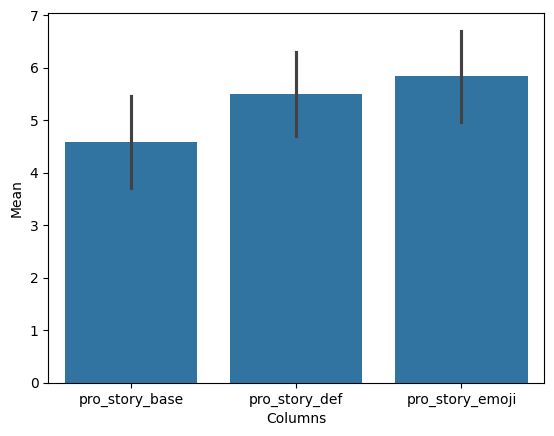

           sum_sq    df   mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)   15.250   2.0  7.625000  1.605876  0.208124  0.044477  0.016551
Residual  327.625  69.0  4.748188       NaN       NaN       NaN       NaN
int_story_base     7.166667
int_story_def      6.041667
int_story_emoji    6.666667
dtype: float64
int_story_base     2.277807
int_story_def      2.156470
int_story_emoji    2.098999
dtype: float64


/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


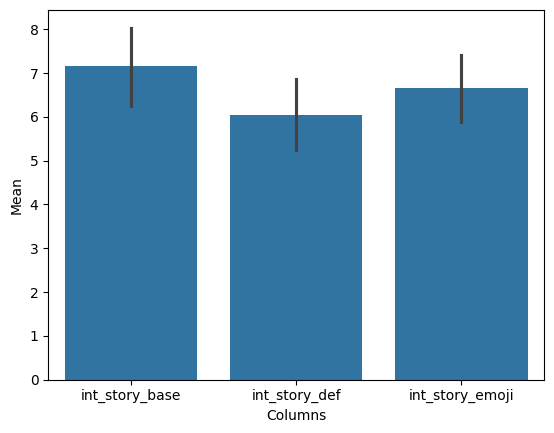

/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


              sum_sq    df    mean_sq          F    PR(>F)    eta_sq  omega_sq
C(voice)   82.694444   2.0  41.347222  10.072227  0.000145  0.225975  0.201282
Residual  283.250000  69.0   4.105072        NaN       NaN       NaN       NaN
soc_story_base     3.666667
soc_story_def      4.958333
soc_story_emoji    6.291667
dtype: float64
soc_story_base     2.014441
soc_story_def      1.781039
soc_story_emoji    2.255027
dtype: float64


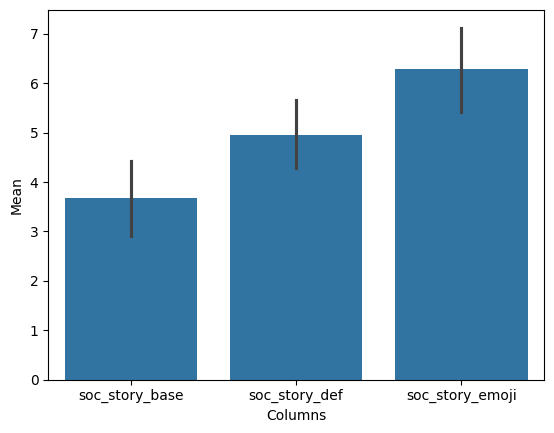

/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


              sum_sq    df     mean_sq          F        PR(>F)    eta_sq  \
C(voice)  303.083333   2.0  151.541667  43.492721  6.010260e-13  0.557651   
Residual  240.416667  69.0    3.484300        NaN           NaN       NaN   

          omega_sq  
C(voice)  0.541359  
Residual       NaN  
exp_story_base     2.958333
exp_story_def      4.041667
exp_story_emoji    7.750000
dtype: float64
exp_story_base     1.573674
exp_story_def      2.010390
exp_story_emoji    1.983629
dtype: float64


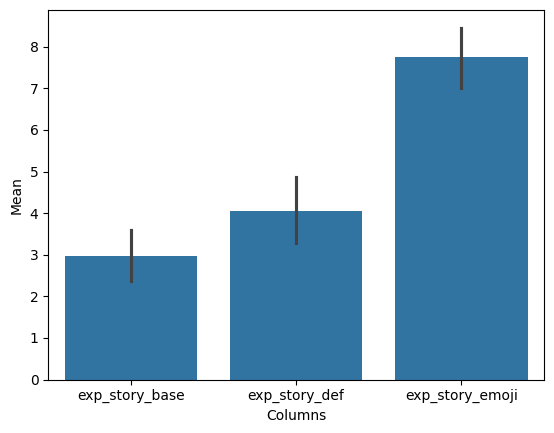

/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


              sum_sq    df    mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)   44.527778   2.0  22.263889  3.709528  0.029501  0.097084  0.069996
Residual  414.125000  69.0   6.001812       NaN       NaN       NaN       NaN
suit_story_base     4.166667
suit_story_def      5.291667
suit_story_emoji    6.083333
dtype: float64
suit_story_base     2.513730
suit_story_def      2.422345
suit_story_emoji    2.412227
dtype: float64


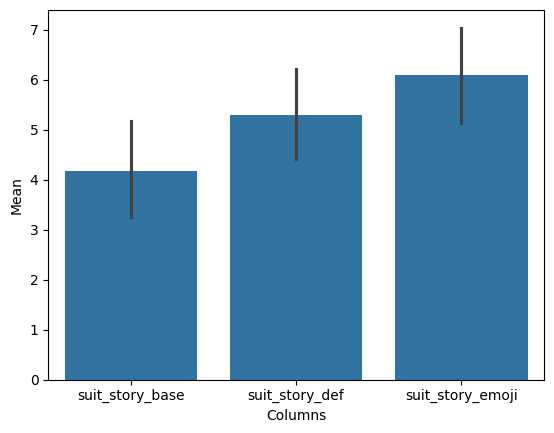

In [261]:
for df in story_mos:
    melted_df = pd.melt(df, var_name='voice', value_name='mos_rating')
    model = ols('mos_rating ~ C(voice)', data=melted_df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table(aov_table))

    means = df.mean()
    std = df.std()
    print(means)
    print(std)
    #data = pd.DataFrame({
    #    'columns': df.columns,
    #    'mean': means,
    #    'std': std
    #})
    #plt.figure(figsize=(8, 6))

    # Plot using Seaborn with error bars
    sns.barplot(x='voice', y='mos_rating', data=melted_df)

    # Add title and labels
    plt.xlabel('Columns')
    plt.ylabel('Mean')

    # Show the plot
    plt.show()

In [122]:
melted_df

,voice,mos_rating
0,suit_story_base,2
1,suit_story_base,2
2,suit_story_base,3
3,suit_story_base,1
4,suit_story_base,2
...,...,...
67,suit_story_emoji,8
68,suit_story_emoji,4
69,suit_story_emoji,10
70,suit_story_emoji,3


In [123]:
import pandas as pd

In [146]:
for df in conv_mos:
    means = df.mean()
    print(means)

pro_conv_base     5.041667
pro_conv_def      6.375000
pro_conv_emoji    5.458333
dtype: float64
int_conv_base     7.541667
int_conv_def      6.750000
int_conv_emoji    6.083333
dtype: float64
soc_conv_base     3.583333
soc_conv_def      6.625000
soc_conv_emoji    5.958333
dtype: float64
exp_conv_base     1.708333
exp_conv_def      5.708333
exp_conv_emoji    7.416667
dtype: float64
suit_conv_base     4.541667
suit_conv_def      6.958333
suit_conv_emoji    5.250000
dtype: float64


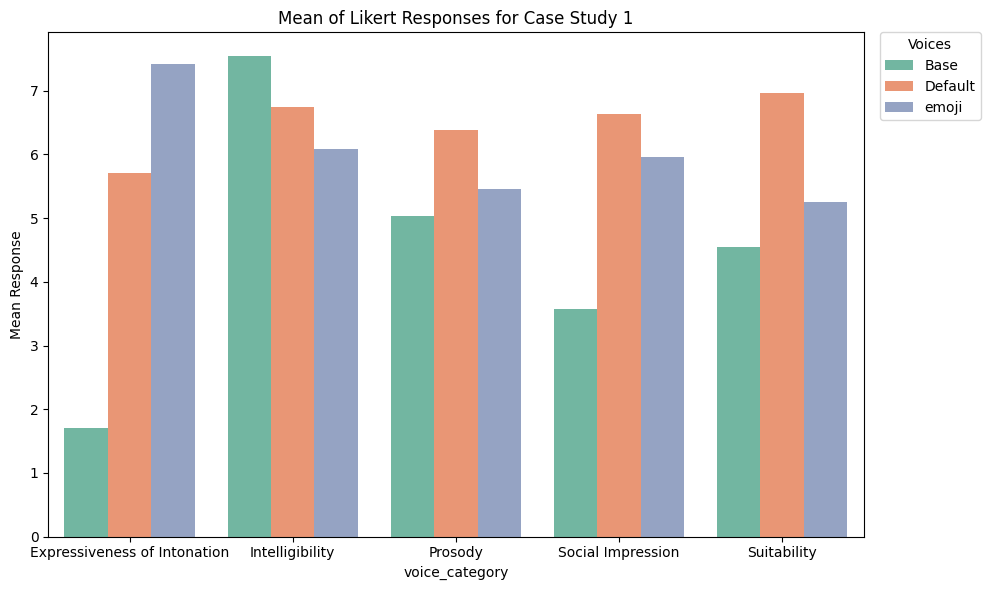

In [154]:
# Example dataframes (replace with your actual data)
df1 = pd.DataFrame({
    'voice_category': ['Prosody', 'Intelligibility', 'Social Impression', 'Expressiveness of Intonation', 'Suitability'],
    'rating': [5.04, 7.54, 3.58, 1.71, 4.54]
})

df2 = pd.DataFrame({
    'voice_category': ['Prosody', 'Intelligibility', 'Social Impression', 'Expressiveness of Intonation', 'Suitability'],
    'rating': [6.38, 6.75, 6.63, 5.71, 6.96]
})

df3 = pd.DataFrame({
    'voice_category': ['Prosody', 'Intelligibility', 'Social Impression', 'Expressiveness of Intonation', 'Suitability'],
    'rating': [5.46, 6.08, 5.96, 7.42, 5.25]
})

# List of dataframes
dfs = [df1, df2, df3]
df_labels = ['Base', 'Default', 'emoji']

# Prepare a new dataframe for plotting
plot_data = pd.DataFrame()

# Calculate the mean ratings for each category in each dataframe
for i, df in enumerate(dfs):
    df_avg = df.groupby('voice_category')['rating'].mean().reset_index()
    df_avg['source'] = df_labels[i]  # Label each dataframe
    plot_data = pd.concat([plot_data, df_avg], axis=0)

# Set up the plot using seaborn for better aesthetics
plt.figure(figsize=(10, 6))

# Create the barplot, using "voice_category" for x-axis, and "source" to group by dataframe
sns.barplot(data=plot_data, x='voice_category', y='rating', hue='source', dodge=True, palette="Set2")

# Adjust legend placement and details
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Voices')  # Legend outside

# Adjust plot details
plt.title('Mean of Likert Responses for Case Study 1')
plt.ylabel('Mean Response')

# Show the plot
plt.tight_layout()  # Optional if spacing is needed
plt.show()

In [126]:
for df in conv_mos:
    means = df.mean()
    print(means)

pro_conv_base     5.041667
pro_conv_def      6.375000
pro_conv_emoji    5.458333
dtype: float64
int_conv_base     7.541667
int_conv_def      6.750000
int_conv_emoji    6.083333
dtype: float64
soc_conv_base     3.583333
soc_conv_def      6.625000
soc_conv_emoji    5.958333
dtype: float64
exp_conv_base     1.708333
exp_conv_def      5.708333
exp_conv_emoji    7.416667
dtype: float64
suit_conv_base     4.541667
suit_conv_def      6.958333
suit_conv_emoji    5.250000
dtype: float64


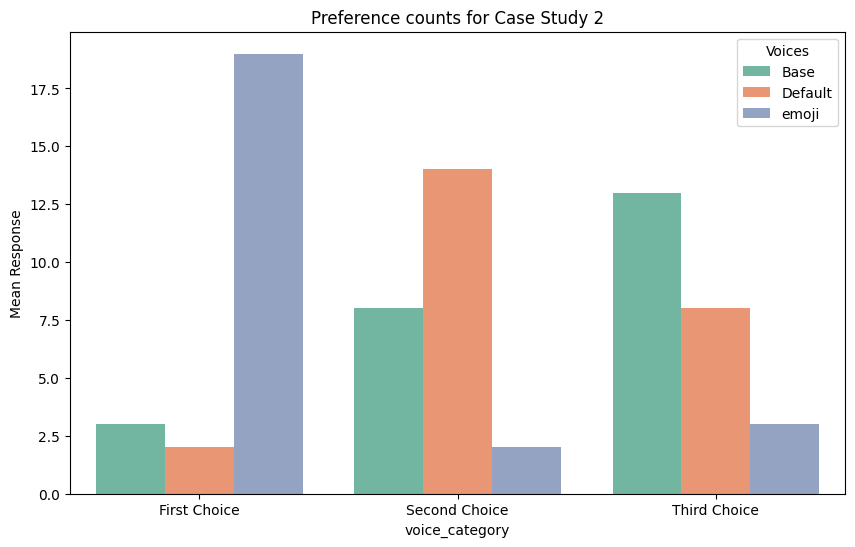

In [272]:
# Example dataframes (replace with your actual data)
df1 = pd.DataFrame({
    'voice_category': ['First Choice', 'Second Choice', 'Third Choice'],
    'rating': [3, 8, 13]
})

df2 = pd.DataFrame({
    'voice_category': ['First Choice', 'Second Choice', 'Third Choice'],
    'rating': [2,14,8]
})

df3 = pd.DataFrame({
    'voice_category': ['First Choice', 'Second Choice', 'Third Choice'],
    'rating': [19,2,3]
})

# List of dataframes
dfs = [df1, df2, df3]
df_labels = ['Base', 'Default', 'emoji']

# Prepare a new dataframe for plotting
plot_data = pd.DataFrame()

# Calculate the mean ratings for each category in each dataframe
for i, df in enumerate(dfs):
    df_avg = df.groupby('voice_category')['rating'].mean().reset_index()
    df_avg['source'] = df_labels[i]  # Label each dataframe
    plot_data = pd.concat([plot_data, df_avg], axis=0)

# Set up the plot using seaborn for better aesthetics
plt.figure(figsize=(10, 6))

# Create the barplot, using "voice_category" for x-axis, and "source" to group by dataframe
sns.barplot(data=plot_data, x='voice_category', y='rating', hue='source', dodge=True, palette="Set2")

# Adjust plot details
plt.title('Preference counts for Case Study 2')
plt.ylabel('Mean Response')

# Display the plot
plt.legend(title='Voices')
plt.show()

              sum_sq    df    mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)   22.333333   2.0  11.166667  2.289464  0.108968  0.062232   0.03458
Residual  336.541667  69.0   4.877415       NaN       NaN       NaN       NaN
pro_conv_base     5.041667
pro_conv_def      6.375000
pro_conv_emoji    5.458333
dtype: float64
pro_conv_base     2.330873
pro_conv_def      1.995920
pro_conv_emoji    2.283764
dtype: float64


/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


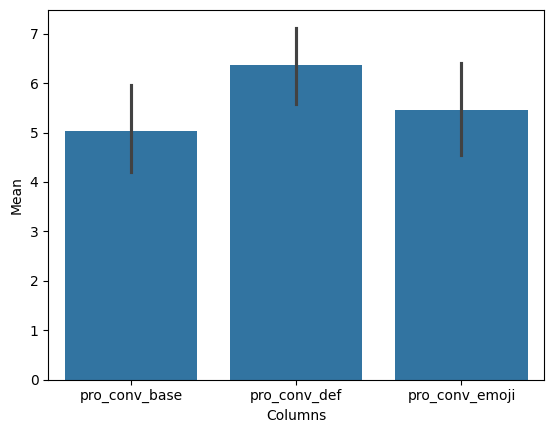

              sum_sq    df    mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)   25.583333   2.0  12.791667  2.519686  0.087868  0.068063  0.040504
Residual  350.291667  69.0   5.076691       NaN       NaN       NaN       NaN
int_conv_base     7.541667
int_conv_def      6.750000
int_conv_emoji    6.083333
dtype: float64
int_conv_base     2.340181
int_conv_def      2.591793
int_conv_emoji    1.742479
dtype: float64


/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


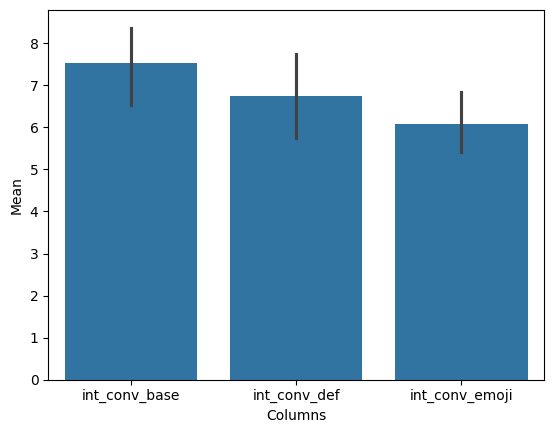

/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


              sum_sq    df    mean_sq          F    PR(>F)    eta_sq  omega_sq
C(voice)  122.694444   2.0  61.347222  13.814387  0.000009  0.285927  0.262513
Residual  306.416667  69.0   4.440821        NaN       NaN       NaN       NaN
soc_conv_base     3.583333
soc_conv_def      6.625000
soc_conv_emoji    5.958333
dtype: float64
soc_conv_base     2.263446
soc_conv_def      1.813296
soc_conv_emoji    2.216130
dtype: float64


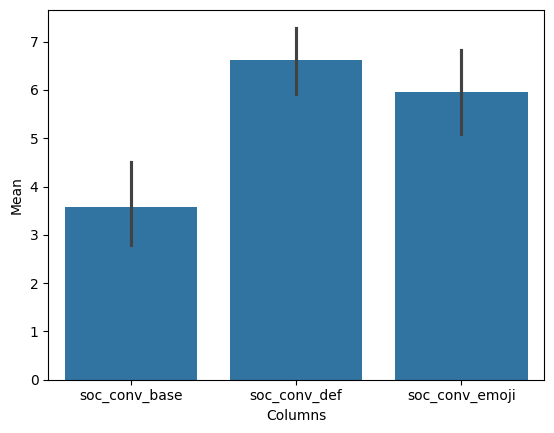

              sum_sq    df     mean_sq          F        PR(>F)    eta_sq  \
C(voice)  412.027778   2.0  206.013889  70.458282  2.136398e-17  0.671298   
Residual  201.750000  69.0    2.923913        NaN           NaN       NaN   

          omega_sq  
C(voice)  0.658633  
Residual       NaN  
exp_conv_base     1.708333
exp_conv_def      5.708333
exp_conv_emoji    7.416667
dtype: float64
exp_conv_base     0.999094
exp_conv_def      2.031901
exp_conv_emoji    1.909169
dtype: float64


/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


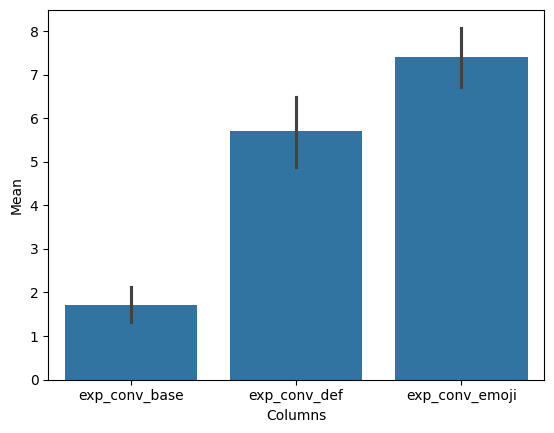

              sum_sq    df    mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)   74.083333   2.0  37.041667  6.212376  0.003305  0.152592  0.126476
Residual  411.416667  69.0   5.962560       NaN       NaN       NaN       NaN
suit_conv_base     4.541667
suit_conv_def      6.958333
suit_conv_emoji    5.250000
dtype: float64
suit_conv_base     2.843439
suit_conv_def      2.330873
suit_conv_emoji    2.090351
dtype: float64


/tmp/ipykernel_229777/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


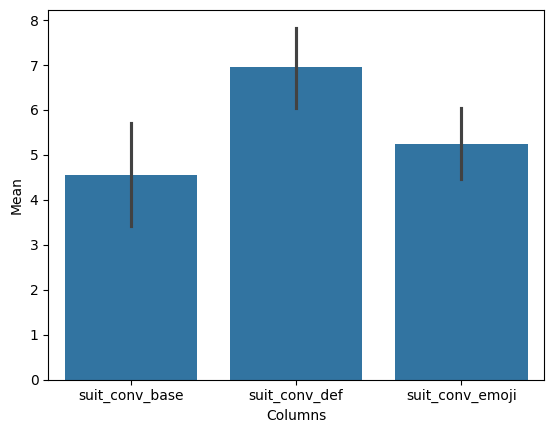

In [264]:
for df in conv_mos:
    melted_df = pd.melt(df, var_name='voice', value_name='mos_rating')
    model = ols('mos_rating ~ C(voice)', data=melted_df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table(aov_table))

    #means = df.mean()
    #std = df.std()
    #data = pd.DataFrame({
    #    'columns': df.columns,
    #    'mean': means,
    #    'std': std
    #})
    #plt.figure(figsize=(8, 6))
    means = df.mean()
    std = df.std()
    print(means)
    print(std)

    # Plot using Seaborn with error bars
    sns.barplot(x='voice', y='mos_rating', data=melted_df)

    # Add title and labels
    plt.xlabel('Columns')
    plt.ylabel('Mean')

    # Show the plot
    plt.show()

In [129]:
story_preference = responses[['first_story', 'second_story', 'third_story']]
conv_preference = responses[['first_conv', 'second_conv', 'third_conv']]

In [171]:
story_preference

,first_story,second_story,third_story
0,Voice 2,Voice 3,Voice 1
1,Voice 3,Voice 1,Voice 2
2,Voice 1,Voice 2,Voice 3
3,Voice 2,Voice 1,Voice 3
4,Voice 3,Voice 1,Voice 2
5,Voice 3,Voice 1,Voice 1
6,Voice 3,Voice 1,Voice 2
7,Voice 3,Voice 1,Voice 2
8,Voice 3,Voice 2,Voice 1
9,Voice 3,Voice 2,Voice 1


In [172]:
story_first_observed = np.array([2, 3, 19])
story_second_observed = np.array([14, 8, 2])
story_third_observed = np.array([8, 13, 3])
conv_first_observed = np.array([3, 4, 17])
conv_second_observed = np.array([9, 9, 6])
conv_third_observed = np.array([12, 11, 1])
expected = np.array([8, 8, 8])

In [173]:
chisquare(f_obs=story_first_observed, f_exp=expected)

Power_divergenceResult(statistic=22.75, pvalue=1.1478899890710543e-05)

In [174]:
chisquare(f_obs=story_second_observed, f_exp=expected)

Power_divergenceResult(statistic=9.0, pvalue=0.011108996538242308)

In [175]:
chisquare(f_obs=story_third_observed, f_exp=expected)

Power_divergenceResult(statistic=6.25, pvalue=0.04393693362340742)

In [132]:
chisquare(f_obs=conv_first_observed, f_exp=expected)

Power_divergenceResult(statistic=15.25, pvalue=0.00048809524352341494)

In [133]:
chisquare(f_obs=conv_second_observed, f_exp=expected)

Power_divergenceResult(statistic=0.75, pvalue=0.6872892787909721)

In [135]:
chisquare(f_obs=conv_third_observed, f_exp=expected)

Power_divergenceResult(statistic=9.25, pvalue=0.00980365503582183)

In [159]:
import scipy.stats as stats

In [180]:
# Original preference counts
counts = [12, 11, 1]  # Preferences for option 1, 2, 3
options = [1, 2, 3]   # The possible choices

# Create dataset
data = []
for option, count in zip(options, counts):
    data.extend([option] * count)

data = np.array(data)

# Parameters for bootstrap
n_iterations = 10000
confidence_level = 0.999

# Store bootstrap results for proportions
bootstrap_results = []

# Perform bootstrap resampling
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    proportions = [np.mean(bootstrap_sample == option) for option in options]
    bootstrap_results.append(proportions)

bootstrap_results = np.array(bootstrap_results)

# Calculate confidence intervals for each option
lower_bounds = np.percentile(bootstrap_results, (1 - confidence_level) / 2 * 100, axis=0)
upper_bounds = np.percentile(bootstrap_results, (1 + confidence_level) / 2 * 100, axis=0)

# Print results
for i, option in enumerate(options):
    mean_proportion = np.mean(bootstrap_results[:, i])
    print(f"Option {option}:")
    print(f"  Mean proportion: {mean_proportion:.3f}")
    print(f"  Confidence Interval: [{lower_bounds[i]:.3f}, {upper_bounds[i]:.3f}]")

Option 1:
  Mean proportion: 0.501
  Confidence Interval: [0.208, 0.833]
Option 2:
  Mean proportion: 0.457
  Confidence Interval: [0.125, 0.792]
Option 3:
  Mean proportion: 0.042
  Confidence Interval: [0.000, 0.208]


In [186]:
# Original preference counts
counts = [8, 13, 3]  # Preferences for option 1, 2, 3
options = [1, 2, 3]   # The possible choices

# Create dataset
data = []
for option, count in zip(options, counts):
    data.extend([option] * count)

data = np.array(data)

# Parameters for bootstrap
n_iterations = 10000
confidence_level = 0.95

# Store bootstrap results for proportions
bootstrap_results = []

# Perform bootstrap resampling
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    proportions = [np.mean(bootstrap_sample == option) for option in options]
    bootstrap_results.append(proportions)

bootstrap_results = np.array(bootstrap_results)

# Calculate confidence intervals for each option
lower_bounds = np.percentile(bootstrap_results, (1 - confidence_level) / 2 * 100, axis=0)
upper_bounds = np.percentile(bootstrap_results, (1 + confidence_level) / 2 * 100, axis=0)

# Print results
for i, option in enumerate(options):
    mean_proportion = np.mean(bootstrap_results[:, i])
    print(f"Option {option}:")
    print(f"  Mean proportion: {mean_proportion:.3f}")
    print(f"  Confidence Interval: [{lower_bounds[i]:.3f}, {upper_bounds[i]:.3f}]")

Option 1:
  Mean proportion: 0.334
  Confidence Interval: [0.167, 0.542]
Option 2:
  Mean proportion: 0.541
  Confidence Interval: [0.333, 0.750]
Option 3:
  Mean proportion: 0.125
  Confidence Interval: [0.000, 0.250]


In [136]:
conv_mos = [conv_prosody, conv_intelligence, conv_social, conv_expressive, conv_suitable]
story_mos = [story_prosody, story_intelligence, story_social, story_expressive, story_suitable]

In [276]:
import statsmodels.stats.multicomp as mc

melted_df = pd.melt(story_suitable, var_name='voice', value_name='mos_rating')
comp = mc.MultiComparison(melted_df['mos_rating'], melted_df['voice'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
suit_story_base,suit_story_def,1.125,0.2565,-0.569,2.819,False
suit_story_base,suit_story_emoji,1.9167,0.0228,0.2227,3.6107,True
suit_story_def,suit_story_emoji,0.7917,0.5055,-0.9023,2.4857,False


In [239]:
responses = pd.read_csv("emoji-voice-case-3.csv")

In [241]:
responses

,pv1,Iv1,socv1,xv1,suv1,satv1,leavev1,stayv1,rconv1,yconv1,...,int4v3,int5v3,eint1v3,eint2v3,eint3v3,eint4v3,eint5v3,first,second,third
0,5,6,4,8,8,8,10,10,10,10,...,1,1,1,1,1,1,1,Voice 1,Voice 2,Voice 3
1,6,7,6,5,3,6,7,6,9,7,...,1,1,1,1,1,1,1,Voice 1,Voice 2,Voice 3
2,10,6,4,8,5,8,10,10,8,10,...,1,1,1,1,1,1,1,Voice 1,Voice 2,Voice 3
3,6,10,7,8,5,10,3,10,10,10,...,7,10,10,10,10,7,10,Voice 1,Voice 3,Voice 2
4,6,8,4,5,5,7,5,6,7,7,...,6,5,4,4,5,7,7,Voice 1,Voice 3,Voice 2
5,6,9,6,8,5,8,3,8,5,7,...,9,8,9,8,8,9,9,Voice 3,Voice 2,Voice 1
6,4,4,6,3,6,6,8,7,3,7,...,6,5,6,6,6,5,6,Voice 2,Voice 3,Voice 1
7,8,9,2,1,3,4,7,4,9,4,...,9,7,9,5,5,5,4,Voice 1,Voice 3,Voice 2


In [242]:
preference = responses[['first', 'second', 'third']]

In [243]:
preference

,first,second,third
0,Voice 1,Voice 2,Voice 3
1,Voice 1,Voice 2,Voice 3
2,Voice 1,Voice 2,Voice 3
3,Voice 1,Voice 3,Voice 2
4,Voice 1,Voice 3,Voice 2
5,Voice 3,Voice 2,Voice 1
6,Voice 2,Voice 3,Voice 1
7,Voice 1,Voice 3,Voice 2


In [244]:
responses = responses.drop(['first', 'second', 'third'], axis=1)

In [245]:
responses

,pv1,Iv1,socv1,xv1,suv1,satv1,leavev1,stayv1,rconv1,yconv1,...,int1v3,int2v3,int3v3,int4v3,int5v3,eint1v3,eint2v3,eint3v3,eint4v3,eint5v3
0,5,6,4,8,8,8,10,10,10,10,...,1,1,1,1,1,1,1,1,1,1
1,6,7,6,5,3,6,7,6,9,7,...,1,1,1,1,1,1,1,1,1,1
2,10,6,4,8,5,8,10,10,8,10,...,1,1,1,1,1,1,1,1,1,1
3,6,10,7,8,5,10,3,10,10,10,...,8,9,10,7,10,10,10,10,7,10
4,6,8,4,5,5,7,5,6,7,7,...,3,3,6,6,5,4,4,5,7,7
5,6,9,6,8,5,8,3,8,5,7,...,9,8,8,9,8,9,8,8,9,9
6,4,4,6,3,6,6,8,7,3,7,...,6,6,6,6,5,6,6,6,5,6
7,8,9,2,1,3,4,7,4,9,4,...,8,8,7,9,7,9,5,5,5,4


In [246]:
dfs = [responses.iloc[[i]] for i in range(len(responses))]

In [247]:
melted_dfs = []
for df in dfs:
    melted_dfs.append(pd.melt(df, var_name='voice', value_name='mos_rating'))

In [248]:
for i, df in enumerate(melted_dfs):
    for index, row in df.iterrows():
        if i == 0:
            melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v1', '_emoji')
            melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v2', '_drop')
            melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v3', '_drop')
        if i == 1:
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v1', '_def')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v2', '_drop')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v3', '_drop')
        if i == 2:
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v1', '_base')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v2', '_drop')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v3', '_drop')
        if i == 3:
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v1', '_base')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v2', '_emoji')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v3', '_def')
        if i == 4:
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v1', '_def')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v2', '_base')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v3', '_emoji')
        if i == 5:
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v1', '_emoji')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v2', '_base')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v3', '_def')
        if i == 6:
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v1', '_def')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v2', '_emoji')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v3', '_base')
        if i == 7:
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v1', '_base')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v2', '_def')
           melted_dfs[i].at[index, 'voice'] = df.at[index, 'voice'].replace('v3', '_emoji')

In [249]:
melted_dfs[2] = melted_dfs[2][~melted_dfs[2]['voice'].str.contains('drop')]
melted_dfs[0] = melted_dfs[0][~melted_dfs[0]['voice'].str.contains('drop')]
melted_dfs[1] = melted_dfs[1][~melted_dfs[1]['voice'].str.contains('drop')]

In [254]:
for i,df in enumerate(melted_dfs):
    # Step 1: Filter rows containing 'int' and 'base'
    int_base_rows = df[df['voice'].str.contains('^int.*base')]
    
    # Step 2: Calculate the average rating for int and base
    average_int_base = int_base_rows['mos_rating'].mean()
    
    # Step 3: Filter rows containing 'int' and 'def'
    int_def_rows = df[df['voice'].str.contains('^int.*def')]
    
    # Step 3: Filter rows containing 'int' and 'def'
    int_emoji_rows = df[df['voice'].str.contains('^int.*emoji')]
    
    # Step 4: Calculate the average rating for int and def
    average_int_def = int_def_rows['mos_rating'].mean()
    
    # Step 4: Calculate the average rating for int and def
    average_int_emoji = int_emoji_rows['mos_rating'].mean()
    
    # Step 5: Create new DataFrames with the average ratings
    int_base_row = pd.DataFrame({'mos_rating': [average_int_base], 'voice': ['int_base']})
    int_def_row = pd.DataFrame({'mos_rating': [average_int_def], 'voice': ['int_def']})
    int_emoji_row = pd.DataFrame({'mos_rating': [average_int_emoji], 'voice': ['int_emoji']})
    
    # Step 6: Remove original 'int' rows and add the new average rows
    melted_dfs[i] = melted_dfs[i][~melted_dfs[i]['voice'].str.contains('^int')]  # Remove original int rows
    melted_dfs[i] = pd.concat([melted_dfs[i], int_base_row, int_def_row, int_emoji_row ], ignore_index=True)  # Add the average rows

    # Step 1: Filter rows containing 'int' and 'base'
    eint_base_rows = df[df['voice'].str.contains('^eint.*base')]
    
    # Step 2: Calculate the average rating for int and base
    average_eint_base = eint_base_rows['mos_rating'].mean()
    
    # Step 3: Filter rows containing 'int' and 'def'
    eint_def_rows = df[df['voice'].str.contains('^eint.*def')]
    
    # Step 3: Filter rows containing 'int' and 'def'
    eint_emoji_rows = df[df['voice'].str.contains('^eint.*emoji')]
    
    # Step 4: Calculate the average rating for int and def
    average_eint_def = eint_def_rows['mos_rating'].mean()
    
    # Step 4: Calculate the average rating for int and def
    average_eint_emoji = eint_emoji_rows['mos_rating'].mean()
    
    # Step 5: Create new DataFrames with the average ratings
    eint_base_row = pd.DataFrame({'mos_rating': [average_eint_base], 'voice': ['eint_base']})
    eint_def_row = pd.DataFrame({'mos_rating': [average_eint_def], 'voice': ['eint_def']})
    eint_emoji_row = pd.DataFrame({'mos_rating': [average_eint_emoji], 'voice': ['eint_emoji']})
    
    # Step 6: Remove original 'int' rows and add the new average rows
    melted_dfs[i] = melted_dfs[i][~melted_dfs[i]['voice'].str.contains('^eint')]  # Remove original int rows
    melted_dfs[i] = pd.concat([melted_dfs[i], eint_base_row, eint_def_row, eint_emoji_row ], ignore_index=True)  # Add the average rows

In [256]:
melted_dfs[0]

,voice,mos_rating
0,p_emoji,5.0
1,I_emoji,6.0
2,soc_emoji,4.0
3,x_emoji,8.0
4,su_emoji,8.0
5,sat_emoji,8.0
6,leave_emoji,10.0
7,stay_emoji,10.0
8,rcon_emoji,10.0
9,ycon_emoji,10.0


In [255]:
melted_dfs[0] = melted_dfs[0][melted_dfs[0].voice != 'int_base']
melted_dfs[0] = melted_dfs[0][melted_dfs[0].voice != 'int_def']
melted_dfs[1] = melted_dfs[1][melted_dfs[1].voice != 'int_base']
melted_dfs[1] = melted_dfs[1][melted_dfs[1].voice != 'int_emoji']
melted_dfs[2] = melted_dfs[2][melted_dfs[2].voice != 'int_def']
melted_dfs[2] = melted_dfs[2][melted_dfs[2].voice != 'int_emoji']
melted_dfs[0] = melted_dfs[0][melted_dfs[0].voice != 'eint_base']
melted_dfs[0] = melted_dfs[0][melted_dfs[0].voice != 'eint_def']
melted_dfs[1] = melted_dfs[1][melted_dfs[1].voice != 'eint_base']
melted_dfs[1] = melted_dfs[1][melted_dfs[1].voice != 'eint_emoji']
melted_dfs[2] = melted_dfs[2][melted_dfs[2].voice != 'eint_def']
melted_dfs[2] = melted_dfs[2][melted_dfs[2].voice != 'eint_emoji']

In [257]:
# Concatenate the unmelted dataframes into one dataframe
combined_df = pd.concat(melted_dfs, ignore_index=True)

In [261]:
prosody = combined_df[combined_df['voice'].str.contains(r'^p_')]
clear = combined_df[combined_df['voice'].str.contains(r'^I_')]
social = combined_df[combined_df['voice'].str.contains(r'^soc_')]
expressive = combined_df[combined_df['voice'].str.contains(r'^x_')]
suitable = combined_df[combined_df['voice'].str.contains(r'^su_')]
satisfy = combined_df[combined_df['voice'].str.contains(r'^sat_')]
leave = combined_df[combined_df['voice'].str.contains(r'^leave_')]
stay = combined_df[combined_df['voice'].str.contains(r'^stay_')]
r_cont = combined_df[combined_df['voice'].str.contains(r'^rcon_')]
y_cont = combined_df[combined_df['voice'].str.contains(r'^ycon_')]
involved = combined_df[combined_df['voice'].str.contains(r'^inv_')]
boring = combined_df[combined_df['voice'].str.contains(r'^bor_')]
interesting = combined_df[combined_df['voice'].str.contains(r'^trest_')]
enjoyment = combined_df[combined_df['voice'].str.contains(r'^enj_')]
intelligence = combined_df[combined_df['voice'].str.contains(r'^int_')]
e_intelligence = combined_df[combined_df['voice'].str.contains(r'^eint_')]

case3_list = [prosody, clear, social, expressive, suitable, satisfy, leave, stay, r_cont, y_cont, involved, boring, interesting, enjoyment, intelligence, e_intelligence]

In [262]:
case3_list[5]

,voice,mos_rating
5,sat_emoji,8.0
21,sat_def,6.0
37,sat_base,8.0
53,sat_base,10.0
67,sat_emoji,3.0
81,sat_def,9.0
101,sat_def,7.0
115,sat_base,6.0
129,sat_emoji,3.0
149,sat_emoji,8.0


             sum_sq    df   mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)  10.777778   2.0  5.388889  1.405797  0.275685  0.157852  0.043143
Residual  57.500000  15.0  3.833333       NaN       NaN       NaN       NaN


/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


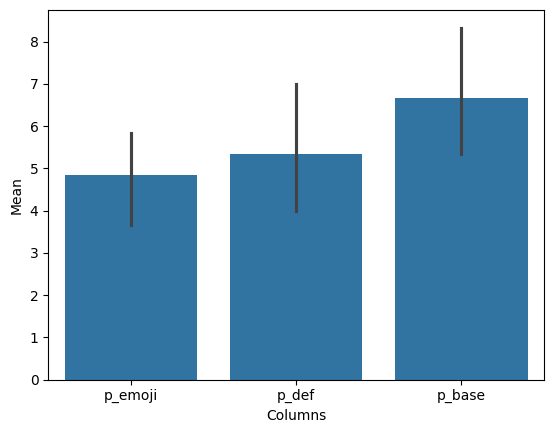

          sum_sq    df  mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)    12.0   2.0      6.0  1.363636  0.285674  0.153846  0.038835
Residual    66.0  15.0      4.4       NaN       NaN       NaN       NaN


/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


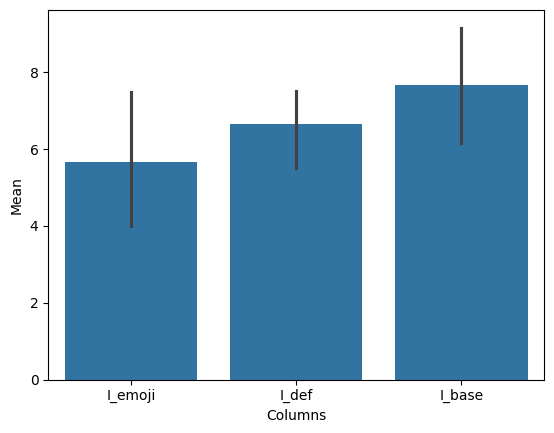

             sum_sq    df   mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)   6.333333   2.0  3.166667  0.956376  0.406516  0.113095 -0.004871
Residual  49.666667  15.0  3.311111       NaN       NaN       NaN       NaN


/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


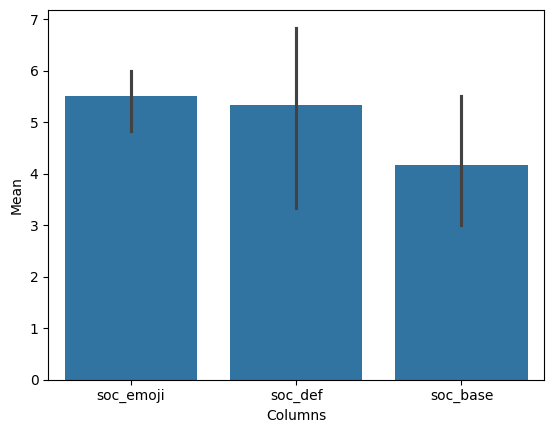

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


             sum_sq    df   mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)  10.111111   2.0  5.055556  0.858491  0.443609  0.102709 -0.015974
Residual  88.333333  15.0  5.888889       NaN       NaN       NaN       NaN


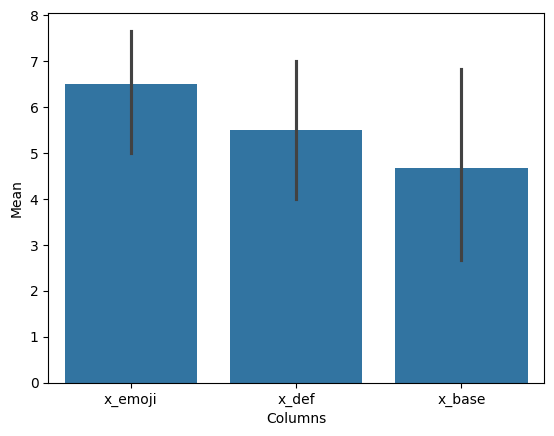

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


             sum_sq    df   mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)   0.111111   2.0  0.055556  0.014006  0.986105  0.001864 -0.123034
Residual  59.500000  15.0  3.966667       NaN       NaN       NaN       NaN


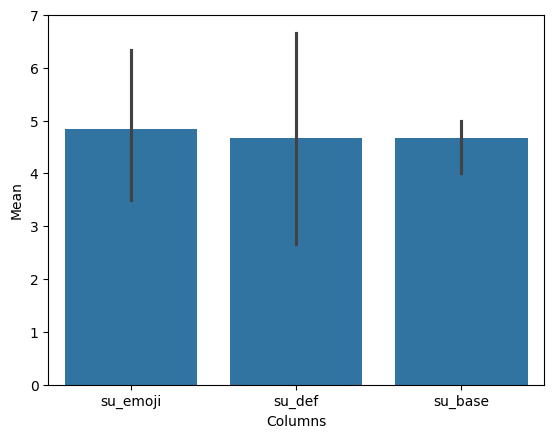

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


          sum_sq    df   mean_sq         F    PR(>F)  eta_sq  omega_sq
C(voice)     3.0   2.0  1.500000  0.292208  0.750768  0.0375 -0.085356
Residual    77.0  15.0  5.133333       NaN       NaN     NaN       NaN


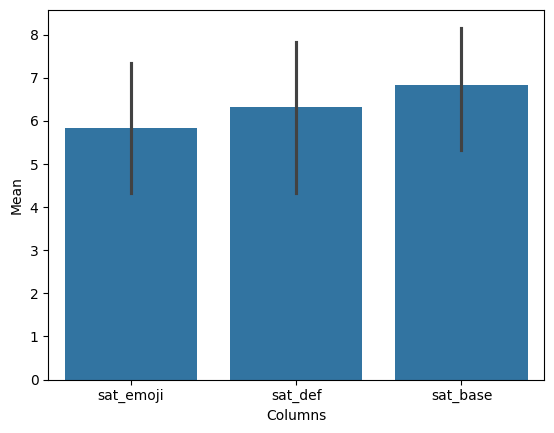

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


              sum_sq    df   mean_sq         F   PR(>F)    eta_sq  omega_sq
C(voice)    3.444444   2.0  1.722222  0.242947  0.78734  0.031377 -0.091843
Residual  106.333333  15.0  7.088889       NaN      NaN       NaN       NaN


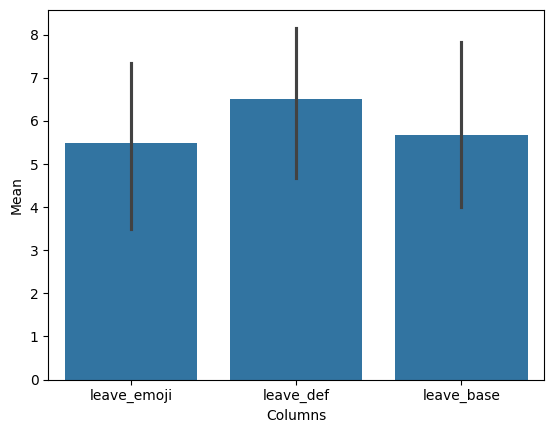

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                sum_sq    df       mean_sq             F  PR(>F)  \
C(voice)  1.025519e-29   2.0  5.127596e-30  6.382899e-31     1.0   
Residual  1.205000e+02  15.0  8.033333e+00           NaN     NaN   

                eta_sq  omega_sq  
C(voice)  8.510533e-32    -0.125  
Residual           NaN       NaN  


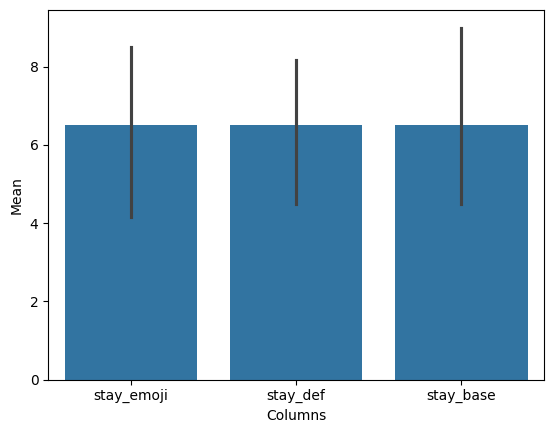

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


              sum_sq    df   mean_sq       F    PR(>F)    eta_sq  omega_sq
C(voice)    7.111111   2.0  3.555556  0.4426  0.650488  0.055725 -0.066022
Residual  120.500000  15.0  8.033333     NaN       NaN       NaN       NaN


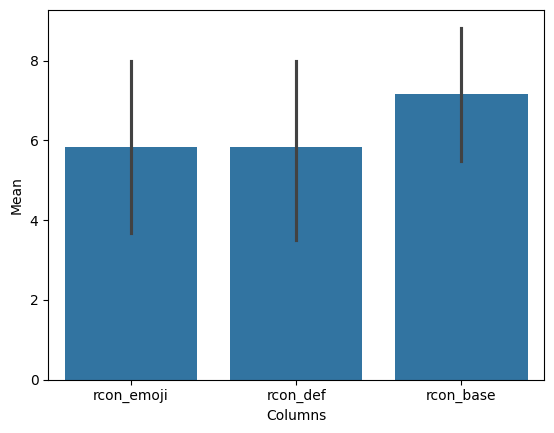

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


             sum_sq    df   mean_sq        F   PR(>F)    eta_sq  omega_sq
C(voice)   5.777778   2.0  2.888889  0.44905  0.64654  0.056491 -0.065209
Residual  96.500000  15.0  6.433333      NaN      NaN       NaN       NaN


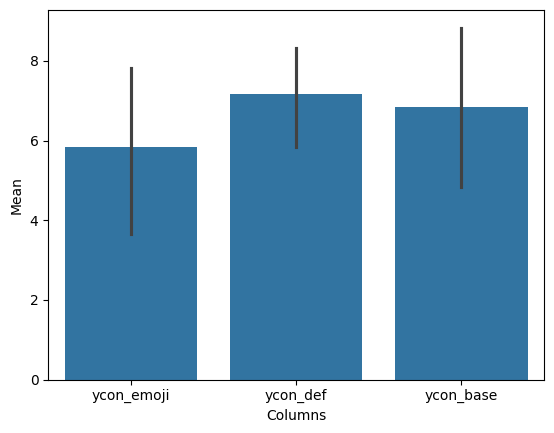

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


              sum_sq    df   mean_sq        F    PR(>F)    eta_sq  omega_sq
C(voice)    8.777778   2.0  4.388889  0.63099  0.545612  0.077603 -0.042754
Residual  104.333333  15.0  6.955556      NaN       NaN       NaN       NaN


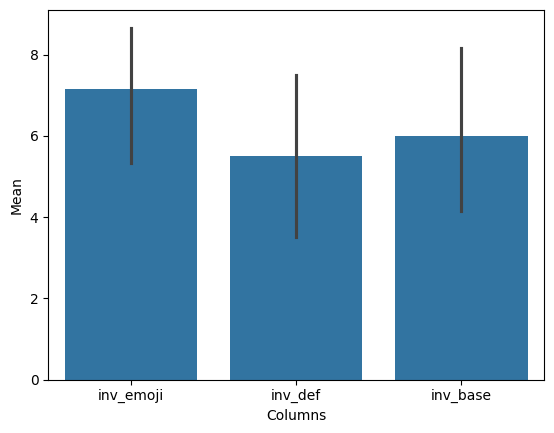

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


          sum_sq    df   mean_sq     F    PR(>F)    eta_sq  omega_sq
C(voice)     1.0   2.0  0.500000  0.06  0.941989  0.007937 -0.116625
Residual   125.0  15.0  8.333333   NaN       NaN       NaN       NaN


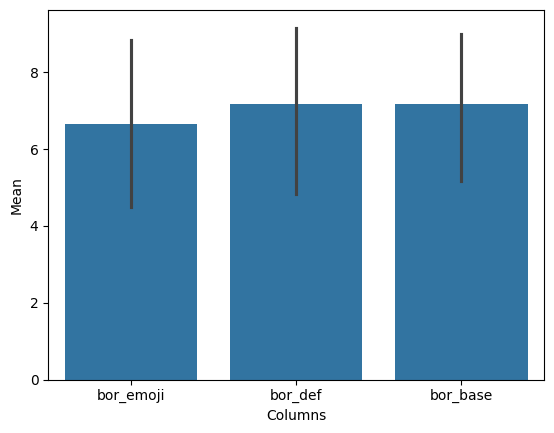

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


             sum_sq    df   mean_sq         F   PR(>F)    eta_sq  omega_sq
C(voice)   4.333333   2.0  2.166667  0.494924  0.61923  0.061905 -0.059456
Residual  65.666667  15.0  4.377778       NaN      NaN       NaN       NaN


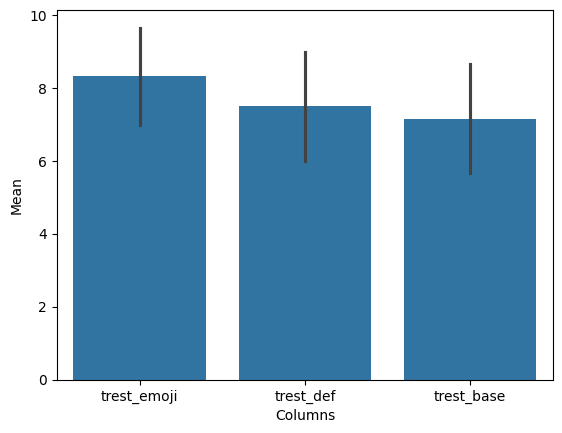

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


          sum_sq    df  mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)     1.0   2.0      0.5  0.080645  0.922918  0.010638 -0.113772
Residual    93.0  15.0      6.2       NaN       NaN       NaN       NaN


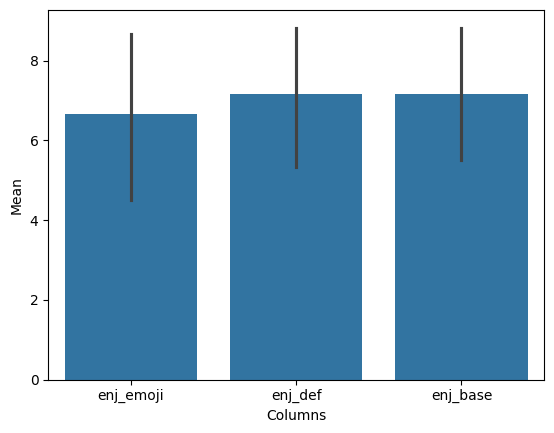

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


             sum_sq    df   mean_sq        F    PR(>F)    eta_sq  omega_sq
C(voice)   1.204444   2.0  0.602222  0.25294  0.779761  0.032625  -0.09052
Residual  35.713333  15.0  2.380889      NaN       NaN       NaN       NaN


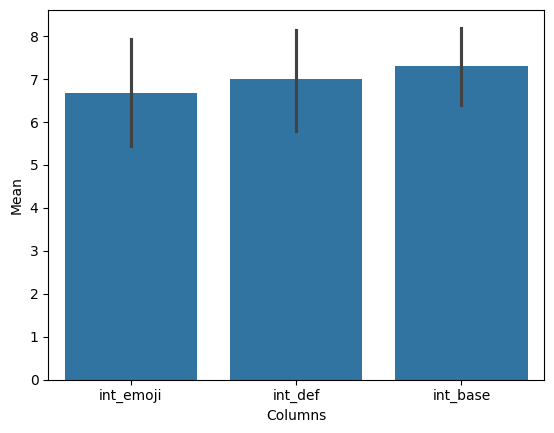

/tmp/ipykernel_8858/1239441889.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


             sum_sq    df   mean_sq         F    PR(>F)    eta_sq  omega_sq
C(voice)   1.337778   2.0  0.668889  0.173267  0.842572  0.022581 -0.101151
Residual  57.906667  15.0  3.860444       NaN       NaN       NaN       NaN


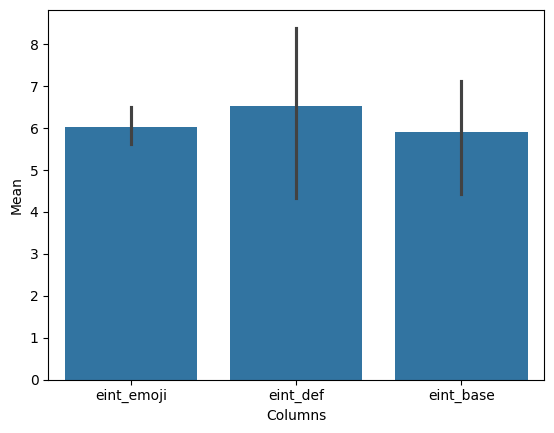

In [263]:
for df in case3_list:
    model = ols('mos_rating ~ C(voice)', data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table(aov_table))

    #means = df.mean()
    #std = df.std()
    #data = pd.DataFrame({
    #    'columns': df.columns,
    #    'mean': means,
    #    'std': std
    #})
    #plt.figure(figsize=(8, 6))
    #means = df.mean()
    #std = df.std()
    #print(means)
    #print(std)

    # Plot using Seaborn with error bars
    sns.barplot(x='voice', y='mos_rating', data=df)

    # Add title and labels
    plt.xlabel('Columns')
    plt.ylabel('Mean')

    # Show the plot
    plt.show()

In [268]:
for df in case3_list:
    print(df.groupby('voice')['mos_rating'].mean())

voice
p_base     6.666667
p_def      5.333333
p_emoji    4.833333
Name: mos_rating, dtype: float64
voice
I_base     7.666667
I_def      6.666667
I_emoji    5.666667
Name: mos_rating, dtype: float64
voice
soc_base     4.166667
soc_def      5.333333
soc_emoji    5.500000
Name: mos_rating, dtype: float64
voice
x_base     4.666667
x_def      5.500000
x_emoji    6.500000
Name: mos_rating, dtype: float64
voice
su_base     4.666667
su_def      4.666667
su_emoji    4.833333
Name: mos_rating, dtype: float64
voice
sat_base     6.833333
sat_def      6.333333
sat_emoji    5.833333
Name: mos_rating, dtype: float64
voice
leave_base     5.666667
leave_def      6.500000
leave_emoji    5.500000
Name: mos_rating, dtype: float64
voice
stay_base     6.5
stay_def      6.5
stay_emoji    6.5
Name: mos_rating, dtype: float64
voice
rcon_base     7.166667
rcon_def      5.833333
rcon_emoji    5.833333
Name: mos_rating, dtype: float64
voice
ycon_base     6.833333
ycon_def      7.166667
ycon_emoji    5.833333
Name

In [ ]:
# Example dataframes (replace with your actual data)
df1 = pd.DataFrame({
    'voice_category': ['prosody', 'clear', 'social', 'expressive', 'suitable', 'satisfy', 'leave', 'stay', 'r_cont', 'y_cont', 'involved', 'boring', 'interesting', 'enjoyment', 'intelligence', 'e_intelligence'],
    'rating': [6.67, 7.67, 4.17, 4.67, 4.67, 6.83, 5.57, 6.5, 7.17, 6.83, 6.0, 7.17, 7.17, 7,17, 7.30, 5.90]
})

df2 = pd.DataFrame({
    'voice_category': ['prosody', 'clear', 'social', 'expressive', 'suitable', 'satisfy', 'leave', 'stay', 'r_cont', 'y_cont', 'involved', 'boring', 'interesting', 'enjoyment', 'intelligence', 'e_intelligence'],
    'rating': [5.33, 6.67, 5.33, 5.5, 4.67, 6.33, 6.5, 6.5, 5.83, 7.17, 5.5, 7.17, 7.5, 7.17, 7.0, 6.53]
})

df3 = pd.DataFrame({
    'voice_category': ['prosody', 'clear', 'social', 'expressive', 'suitable', 'satisfy', 'leave', 'stay', 'r_cont', 'y_cont', 'involved', 'boring', 'interesting', 'enjoyment', 'intelligence', 'e_intelligence'],
    'rating': [4.83, 5.67, 5.5, 6.5, 4.83, 5.83, 5.5, 6.5, 5.83, 5.83, 7.17, 6.67, 8.33, 6.67, 6.67, 6.03]
})

# List of dataframes
dfs = [df1, df2, df3]
df_labels = ['Base', 'Default', 'emoji']

# Prepare a new dataframe for plotting
plot_data = pd.DataFrame()

# Calculate the mean ratings for each category in each dataframe
for i, df in enumerate(dfs):
    df_avg = df.groupby('voice_category')['rating'].mean().reset_index()
    df_avg['source'] = df_labels[i]  # Label each dataframe
    plot_data = pd.concat([plot_data, df_avg], axis=0)

# Set up the plot using seaborn for better aesthetics
plt.figure(figsize=(10, 6))

# Create the barplot, using "voice_category" for x-axis, and "source" to group by dataframe
sns.barplot(data=plot_data, x='voice_category', y='rating', hue='source', dodge=True, palette="Set2")

# Adjust plot details
plt.title('Mean of Likert Responses for Case Study 1')
plt.ylabel('Mean Response')

# Display the plot
plt.legend(title='Voices')
plt.show()